Exercicis per practicar amb regressions.
- Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.


- Regressió Lineal 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
df = pd.read_excel('Housing data.xslx.xlsx')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df.columns = ['Crime Rate', 'Residential Zone', 'Non Retail bsn', 'Dummy Var', 'Nitric Ox Concetration', 'Room Average', 'Owners', 'Dist Boston Jobs', 'Index Highways Distance', 'Tax rate', 'School Ratio', 'Blacks Average', 'Perc Status Popul', 'Median Value Homes']
df.columns

Index(['Crime Rate', 'Residential Zone', 'Non Retail bsn', 'Dummy Var',
       'Nitric Ox Concetration', 'Room Average', 'Owners', 'Dist Boston Jobs',
       'Index Highways Distance', 'Tax rate', 'School Ratio', 'Blacks Average',
       'Perc Status Popul', 'Median Value Homes'],
      dtype='object')

In [6]:
df

,Crime Rate,Residential Zone,Non Retail bsn,Dummy Var,Nitric Ox Concetration,Room Average,Owners,Dist Boston Jobs,Index Highways Distance,Tax rate,School Ratio,Blacks Average,Perc Status Popul,Median Value Homes
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


Selección del Modelo 

Es Aprendizaje Supervisado ya que tanto el Input como el Output están definidos y el Output será numérico, por lo tanto, utilizaremos Regresiones en lugar de Clasificaciones
Tomaré la variable de "Crime Rate " y observar cómo incide en el valor de "Median Value Homes"

In [7]:
X = df.iloc[:, 0]
Y = df.iloc[:, 13]
df.head()

,Crime Rate,Residential Zone,Non Retail bsn,Dummy Var,Nitric Ox Concetration,Room Average,Owners,Dist Boston Jobs,Index Highways Distance,Tax rate,School Ratio,Blacks Average,Perc Status Popul,Median Value Homes
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620


In [8]:
print(X, Y)

0        632
1       2731
2       2729
3       3237
4       6905
       ...  
501     6263
502     4527
503     6076
504    10959
505     4741
Name: Crime Rate, Length: 506, dtype: int64 0      2400
1      2160
2      3470
3      3340
4      3620
       ... 
501    2240
502    2060
503    2390
504    2200
505    1190
Name: Median Value Homes, Length: 506, dtype: int64


<AxesSubplot:>

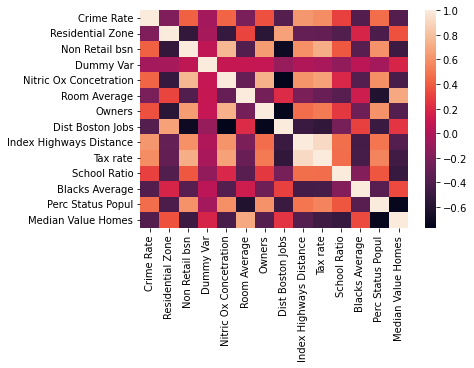

In [9]:
sns.heatmap(df.corr())

In [10]:
print(df[['Crime Rate','Median Value Homes']])

     Crime Rate  Median Value Homes
0           632                2400
1          2731                2160
2          2729                3470
3          3237                3340
4          6905                3620
..          ...                 ...
501        6263                2240
502        4527                2060
503        6076                2390
504       10959                2200
505        4741                1190

[506 rows x 2 columns]


In [11]:

data1 = df[['Crime Rate', 'Median Value Homes']]
data1

,Crime Rate,Median Value Homes
0,632,2400
1,2731,2160
2,2729,3470
3,3237,3340
4,6905,3620
...,...,...
501,6263,2240
502,4527,2060
503,6076,2390
504,10959,2200


<AxesSubplot:>

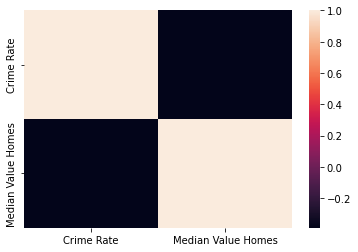

In [12]:
sns.heatmap(data1.corr())

In [13]:
data1

,Crime Rate,Median Value Homes
0,632,2400
1,2731,2160
2,2729,3470
3,3237,3340
4,6905,3620
...,...,...
501,6263,2240
502,4527,2060
503,6076,2390
504,10959,2200


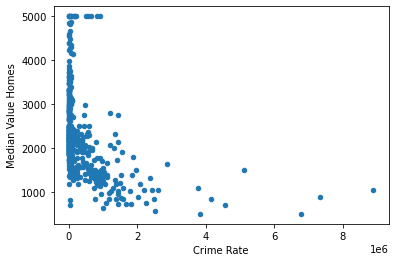

In [14]:
data1.plot(kind='scatter', x= 'Crime Rate', y ='Median Value Homes')
plt.show()

No se ve una línea clara que confirme que las variables "Crime Rate" y "Median Value Homes" estén relacionadas

In [15]:
data2 = df[['Dist Boston Jobs', 'Median Value Homes']]
data2

,Dist Boston Jobs,Median Value Homes
0,40900,2400
1,49671,2160
2,49671,3470
3,60622,3340
4,60622,3620
...,...,...
501,24786,2240
502,22875,2060
503,21675,2390
504,23889,2200


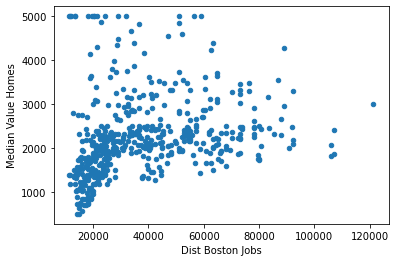

In [16]:
data2.plot(kind='scatter', x= 'Dist Boston Jobs', y ='Median Value Homes')
plt.show()

In [17]:
X = data2['Dist Boston Jobs']
Y = data2['Median Value Homes']
print(X)
print(Y)

0      40900
1      49671
2      49671
3      60622
4      60622
       ...  
501    24786
502    22875
503    21675
504    23889
505    25050
Name: Dist Boston Jobs, Length: 506, dtype: int64
0      2400
1      2160
2      3470
3      3340
4      3620
       ... 
501    2240
502    2060
503    2390
504    2200
505    1190
Name: Median Value Homes, Length: 506, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
train, test = train_test_split(data2, test_size = 0.30)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  354
Ejemplos usados para test:  152


In [20]:
 # Test train split for supervised training
                                                  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)

<function matplotlib.pyplot.show(close=None, block=None)>

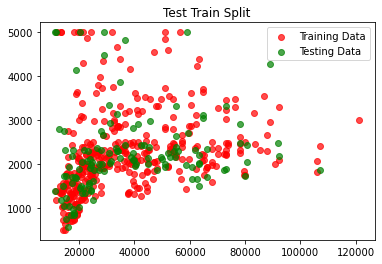

In [21]:
#Test train split for visualization
plt.scatter(X_train, y_train, label = 'Training Data', color ='r', alpha=.7)
plt.scatter(X_test, y_test, label = 'Testing Data', color = 'g', alpha = .7)
plt.legend()
plt.title('Test Train Split')
plt.show

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [23]:
# Create Linear Model and train it 
lr.fit(X_train.values.reshape(-1,1), y_train.values)

C:\Users\flore\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

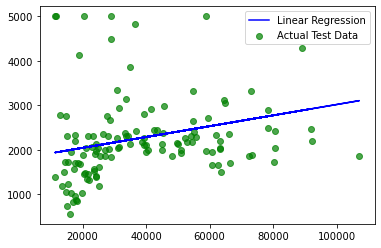

In [24]:
#Usaremos el modelo para predecir con la TEst Data: x test y test 
prediction = lr.predict(X_test.values.reshape(-1,1))

#Compararemos en un gráfico la línea de predicción con la Data Real
plt.plot(X_test, prediction, label = 'Linear Regression', color ='b')
plt.scatter(X_test, y_test, label = 'Actual Test Data', color = 'g', alpha =.7)
plt.legend()
plt.show()

In [25]:
lr.predict(np.array([[85000]]))[0]

2835.025819370583

In [26]:
lr.score(X_test.values.reshape(-1, 1), y_test.values)

0.015745008999929033

- Exercici 2
Compara’ls en base al MSE i al R2.


In [34]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2]
mean_absolute_error(X_test, y_test)

36111.149606299216

In [28]:
X = data2['Dist Boston Jobs']
Y = data2['Median Value Homes']
print(X)
print(Y)

0      40900
1      49671
2      49671
3      60622
4      60622
       ...  
501    24786
502    22875
503    21675
504    23889
505    25050
Name: Dist Boston Jobs, Length: 506, dtype: int64
0      2400
1      2160
2      3470
3      3340
4      3620
       ... 
501    2240
502    2060
503    2390
504    2200
505    1190
Name: Median Value Homes, Length: 506, dtype: int64


R-Squared Value

In [29]:
import numpy
from sklearn.metrics import r2_score

mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))

print(r2_score(Y, mymodel(X))) 

0.10502427275633663


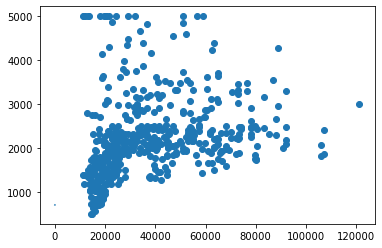

In [35]:
mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))
plt.scatter(X, Y)
myline = numpy.linspace(4, 10, 10)
plt.plot(myline, mymodel(myline))
plt.show()

In [31]:
import numpy
from sklearn.metrics import r2_score

mymodel = numpy.poly1d(numpy.polyfit(X, Y, 3))

print(r2_score(Y, mymodel(X)))

0.10502427275633663
